In [1]:
import os
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Function to extract MFCC features from audio files
def extract_features(audio_path, mfcc_dim=13, n_mfcc=20, duration=2, hop_length=512, n_fft=2048):
    audio, _ = librosa.load(audio_path, duration=duration, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=16000, n_mfcc=n_mfcc, hop_length=hop_length, n_fft=n_fft)
    return mfccs.T

# Load audio files and extract features
data_path = r"F:\dataset"
labels = []
features = []

for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            if file.endswith(".wav"):
                audio_path = os.path.join(folder_path, file)
                label = folder
                labels.append(label)
                features.append(extract_features(audio_path))

# Encode labels into numerical values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
num_classes = len(set(encoded_labels))

# Convert features and labels to numpy arrays
features = np.array(features)
encoded_labels = to_categorical(encoded_labels, num_classes=num_classes)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels, test_size=0.2, random_state=42)

# Build a CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Reshape features for CNN input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/10
20/20 [==============================] - 3s 79ms/step - loss: 62.0623 - accuracy: 0.6266 - val_loss: 26.6518 - val_accuracy: 0.7188
Epoch 2/10
20/20 [==============================] - 1s 48ms/step - loss: 9.1753 - accuracy: 0.7016 - val_loss: 0.7182 - val_accuracy: 0.6938
Epoch 3/10
20/20 [==============================] - 1s 49ms/step - loss: 0.9657 - accuracy: 0.7234 - val_loss: 0.6023 - val_accuracy: 0.7250
Epoch 4/10
20/20 [==============================] - 1s 47ms/step - loss: 0.6861 - accuracy: 0.7406 - val_loss: 0.5500 - val_accuracy: 0.7188
Epoch 5/10
20/20 [==============================] - 1s 49ms/step - loss: 0.5521 - accuracy: 0.7578 - val_loss: 0.5105 - val_accuracy: 0.7188
Epoch 6/10
20/20 [==============================] - 1s 50ms/step - loss: 0.4612 - accuracy: 0.7578 - val_loss: 0.4234 - val_accuracy: 0.7188
Epoch 7/10
20/20 [==============================] - 1s 48ms/step - loss: 0.4486 - accuracy: 0.7578 - val_loss: 0.4296 - val_accuracy: 0.7188
Epoch 8/10


C:\Users\Dell\AppData\Local\Temp\ipykernel_17908\915237751.py:27: RuntimeWarning: invalid value encountered in arcsin
  angles = np.arcsin(time_delays * speed_of_sound / microphone_distance)


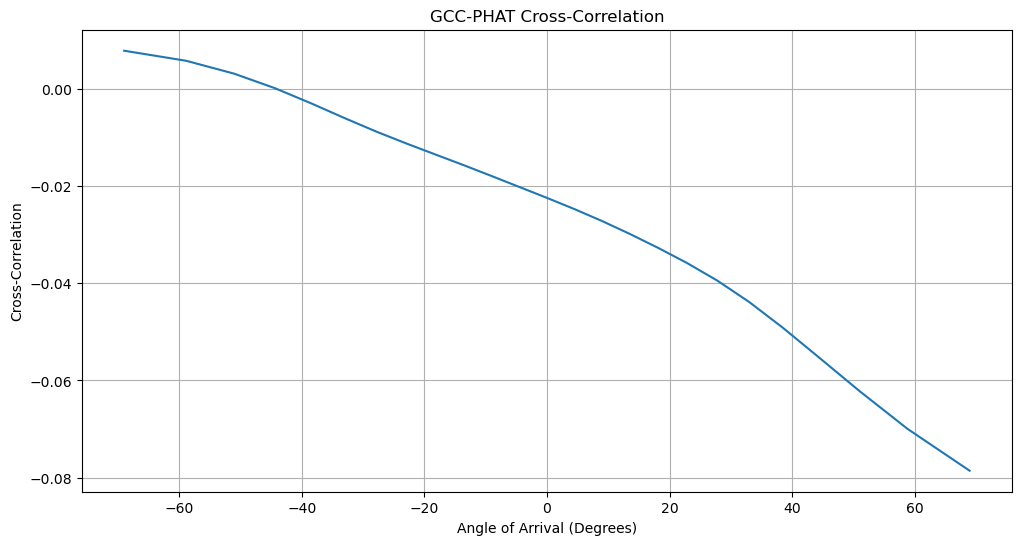

Estimated Angle of Arrival for Sound Source: nan degrees


In [3]:
import numpy as np
import scipy.signal as signal
import librosa
import matplotlib.pyplot as plt

# Constants
speed_of_sound = 343  # Speed of sound in air in meters/second
microphone_distance = 0.1  # Distance between microphones in meters

# Load your audio files (replace 'path/to/your/audio1.wav' and 'path/to/your/audio2.wav' with actual file paths)
audio_file1 = 'F:/dataset/foa_dev/fold1_room1_mix009_ov1.wav'
audio_file2 = 'F:/dataset/foa_dev/fold1_room1_mix013_ov1.wav'

# Load audio files and resample to a common sampling rate if necessary
sampling_rate = 44100  # Sampling rate in Hz
signal1, sr1 = librosa.load(audio_file1, sr=sampling_rate)
signal2, sr2 = librosa.load(audio_file2, sr=sampling_rate)

# Compute GCC-PHAT cross-correlation
cross_correlation = signal.correlate(signal1, signal2, mode='full', method='fft')
lags = np.arange(-len(signal1) + 1, len(signal1))

# Compute time delays from cross-correlation
time_delays = lags / sampling_rate

# Compute angles of arrival using time delays
angles = np.arcsin(time_delays * speed_of_sound / microphone_distance)
angles_degrees = np.rad2deg(angles)

# Plot GCC-PHAT cross-correlation result
plt.figure(figsize=(12, 6))
plt.plot(angles_degrees, cross_correlation)
plt.title('GCC-PHAT Cross-Correlation')
plt.xlabel('Angle of Arrival (Degrees)')
plt.ylabel('Cross-Correlation')
plt.grid(True)
plt.show()

# Estimate sound source location
estimated_angle = angles_degrees[np.argmax(cross_correlation)]
print(f"Estimated Angle of Arrival for Sound Source: {estimated_angle} degrees")


In [6]:
import os
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Constants
speed_of_sound = 343  # Speed of sound in air in meters/second
microphone_distance = 0.1  # Distance between microphones in meters

# Function to compute GCC-PHAT for two microphone signals
def compute_gcc_phat(signal1, signal2, sampling_rate):
    # Compute GCC-PHAT cross-correlation
    cross_correlation = signal.correlate(signal1, signal2, mode='full', method='fft')
    lags = np.arange(-len(signal1) + 1, len(signal1))
    
    # Compute time delays from cross-correlation
    time_delays = lags / sampling_rate
    
    # Compute angles of arrival using time delays
    angles = np.arcsin(time_delays * speed_of_sound / microphone_distance)
    angles_degrees = np.rad2deg(angles)
    
    return angles_degrees, cross_correlation

# Process audio recordings for each location
data_path = r"F:\dataset\foa_dev"
results = {}

for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder)
    if os.path.isdir(folder_path):
        # Get a list of audio files in this location
        audio_files = [f for f in os.listdir(folder_path) if f.endswith(".wav")]
        
        if len(audio_files) >= 2:
            # Load the first two audio files
            audio_path1 = os.path.join(folder_path, audio_files[0])
            audio_path2 = os.path.join(folder_path, audio_files[1])
            audio1, _ = librosa.load(audio_path1, sr=None)
            audio2, _ = librosa.load(audio_path2, sr=None)
            
            # Compute GCC-PHAT
            angles_degrees, cross_correlation = compute_gcc_phat(audio1, audio2, sampling_rate)
            
            # Store the results
            results[folder] = {"angles_degrees": angles_degrees, "cross_correlation": cross_correlation}




In [7]:
# Visualize the results
for location, data in results.items():
    angles_degrees = data["angles_degrees"]
    cross_correlation = data["cross_correlation"]
    
    plt.figure(figsize=(12, 6))
    plt.plot(angles_degrees, cross_correlation)
    plt.title(f"GCC-PHAT Cross-Correlation for Location '{location}'")
    plt.xlabel('Angle of Arrival (Degrees)')
    plt.ylabel('Cross-Correlation')
    plt.grid(True)
    plt.show()

In [8]:
import os
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Constants
speed_of_sound = 343  # Speed of sound in air in meters/second
microphone_distance = 0.1  # Distance between microphones in meters

# Function to compute GCC-PHAT for two microphone signals
def compute_gcc_phat(signal1, signal2, sampling_rate):
    # Compute GCC-PHAT cross-correlation
    cross_correlation = signal.correlate(signal1, signal2, mode='full', method='fft')
    lags = np.arange(-len(signal1) + 1, len(signal1))
    
    # Compute time delays from cross-correlation
    time_delays = lags / sampling_rate
    
    # Compute angles of arrival using time delays
    angles = np.arcsin(time_delays * speed_of_sound / microphone_distance)
    angles_degrees = np.rad2deg(angles)
    
    return angles_degrees, cross_correlation

# Process audio recordings for each location
data_path = r"F:\dataset\foa_dev"
results = {}

for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder)
    if os.path.isdir(folder_path):
        # Get a list of audio files in this location
        audio_files = [f for f in os.listdir(folder_path) if f.endswith(".wav")]
        
        if len(audio_files) >= 2:
            # Load the first two audio files
            audio_path1 = os.path.join(folder_path, audio_files[0])
            audio_path2 = os.path.join(folder_path, audio_files[1])
            audio1, _ = librosa.load(audio_path1, sr=None)
            audio2, _ = librosa.load(audio_path2, sr=None)
            
            # Compute GCC-PHAT
            angles_degrees, cross_correlation = compute_gcc_phat(audio1, audio2, sampling_rate)
            
            # Store the results
            results[folder] = {"angles_degrees": angles_degrees, "cross_correlation": cross_correlation}

            # Visualize the results
            plt.figure(figsize=(12, 6))
            plt.plot(angles_degrees, cross_correlation)
            plt.title(f"GCC-PHAT Cross-Correlation for Location '{folder}'")
            plt.xlabel('Angle of Arrival (Degrees)')
            plt.ylabel('Cross-Correlation')
            plt.grid(True)
            plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


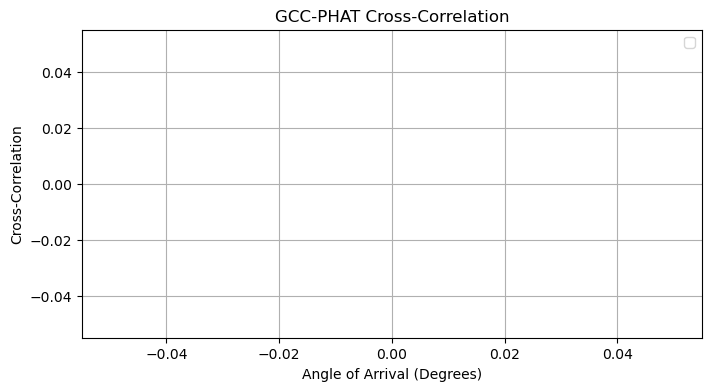

In [12]:
import os
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Constants
speed_of_sound = 343  # Speed of sound in air in meters/second
microphone_distance = 0.1  # Distance between microphones in meters

# Function to compute GCC-PHAT for two microphone signals
def compute_gcc_phat(signal1, signal2, sampling_rate):
    # Compute GCC-PHAT cross-correlation
    cross_correlation = signal.correlate(signal1, signal2, mode='full', method='fft')
    lags = np.arange(-len(signal1) + 1, len(signal1))
    
    # Compute time delays from cross-correlation
    time_delays = lags / sampling_rate
    
    # Compute angles of arrival using time delays
    angles = np.arcsin(time_delays * speed_of_sound / microphone_distance)
    angles_degrees = np.rad2deg(angles)
    
    return angles_degrees, cross_correlation

# Process audio recordings for each location
data_path = r"F:\dataset\foa_dev"
results = {}

# Create a subplot for displaying all plots in the same window
fig, ax = plt.subplots(figsize=(8, 4))

for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder)
    if os.path.isdir(folder_path):
        # Get a list of audio files in this location
        audio_files = [f for f in os.listdir(folder_path) if f.endswith(".wav")]
        
        if len(audio_files) >= 2:
            # Load the first two audio files
            audio_path1 = os.path.join(folder_path, audio_files[0])
            audio_path2 = os.path.join(folder_path, audio_files[1])
            audio1, _ = librosa.load(audio_path1, sr=None)
            audio2, _ = librosa.load(audio_path2, sr=None)
            
            # Compute GCC-PHAT
            angles_degrees, cross_correlation = compute_gcc_phat(audio1, audio2, sampling_rate)
            
            # Store the results
            results[folder] = {"angles_degrees": angles_degrees, "cross_correlation": cross_correlation}

            # Plot the GCC-PHAT cross-correlation on the same subplot
            ax.plot(angles_degrees, cross_correlation, label=f"Location '{folder}'")

# Set plot labels and legend
ax.set_title("GCC-PHAT Cross-Correlation")
ax.set_xlabel("Angle of Arrival (Degrees)")
ax.set_ylabel("Cross-Correlation")
ax.grid(True)
ax.legend()
plt.plot(figsize=(8,5))
plt.show()


F:\dataset


C:\Users\Dell\AppData\Local\Temp\ipykernel_17908\3481317707.py:20: RuntimeWarning: invalid value encountered in arcsin
  angles = np.arcsin(time_delays * speed_of_sound / microphone_distance)


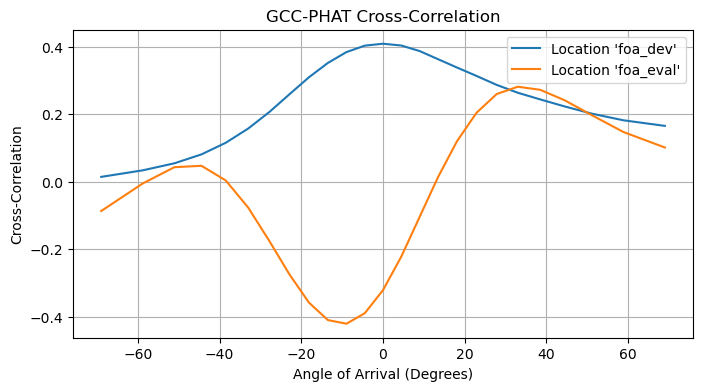

In [18]:
import os
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Constants
speed_of_sound = 343  # Speed of sound in air in meters/second
microphone_distance = 0.1  # Distance between microphones in meters

# Function to compute GCC-PHAT for two microphone signals
def compute_gcc_phat(signal1, signal2, sampling_rate):
    # Compute GCC-PHAT cross-correlation
    cross_correlation = signal.correlate(signal1, signal2, mode='full', method='fft')
    lags = np.arange(-len(signal1) + 1, len(signal1))
    
    # Compute time delays from cross-correlation
    time_delays = lags / sampling_rate
    
    # Compute angles of arrival using time delays
    angles = np.arcsin(time_delays * speed_of_sound / microphone_distance)
    angles_degrees = np.rad2deg(angles)
    
    return angles_degrees, cross_correlation

# Process audio recordings for each location
data_path = r"F:\dataset"
print(data_path)
results = []

# Create a single plot for displaying all plots in the same window
plt.figure(figsize=(8, ))

for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder)
    if os.path.isdir(folder_path):
        # Get a list of audio files in this location
        audio_files = [f for f in os.listdir(folder_path) if f.endswith(".wav")]
        
        if len(audio_files) >= 2:
            # Load the first two audio files
            audio_path1 = os.path.join(folder_path, audio_files[0])
            audio_path2 = os.path.join(folder_path, audio_files[1])
            audio1, _ = librosa.load(audio_path1, sr=None)
            audio2, _ = librosa.load(audio_path2, sr=None)
            
            # Compute GCC-PHAT
            angles_degrees, cross_correlation = compute_gcc_phat(audio1, audio2, sampling_rate)
            
            # Store the results
            results.append({"angles_degrees": angles_degrees, "cross_correlation": cross_correlation, "label": folder})

            # Plot the GCC-PHAT cross-correlation on the same plot
            plt.plot(angles_degrees, cross_correlation, label=f"Location '{folder}'")

# Set plot labels and legend
plt.title("GCC-PHAT Cross-Correlation")
plt.xlabel("Angle of Arrival (Degrees)")
plt.ylabel("Cross-Correlation")
plt.grid(True)
plt.legend()
plt.show()


In [5]:
#Import stuff

import numpy as np
import random
import itertools
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
def load_audio_file(file_path):
    input_length = 16000
    data = librosa.core.load(file_path)[0] #, sr=16000
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
    return data
def plot_time_series(data):
    fig = plt.figure(figsize=(8, 4))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()

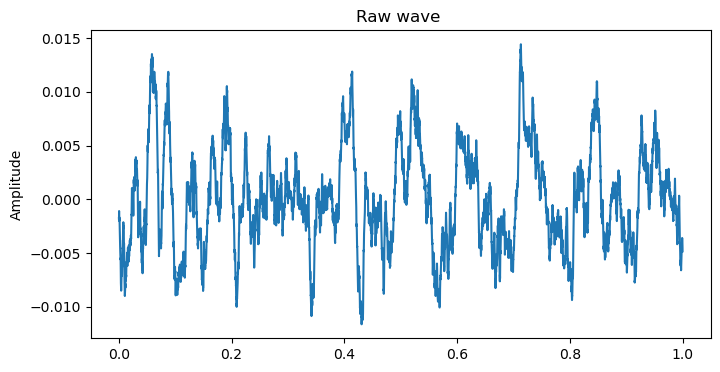

In [7]:
data = load_audio_file('F:/dataset/foa_dev/fold1_room1_mix009_ov1.wav')
plot_time_series(data)

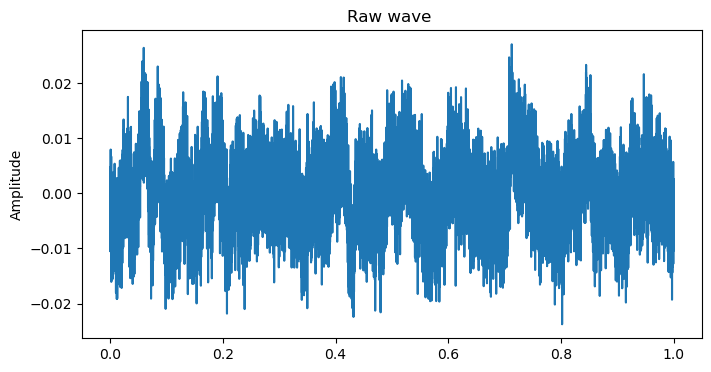

In [8]:
# Adding white noise 
wn = np.random.randn(len(data))
data_wn = data + 0.005*wn
plot_time_series(data_wn)
# We limited the amplitude of the noise so we can still hear the word even with the noise, 
#which is the objective
ipd.Audio(data_wn, rate=16000)

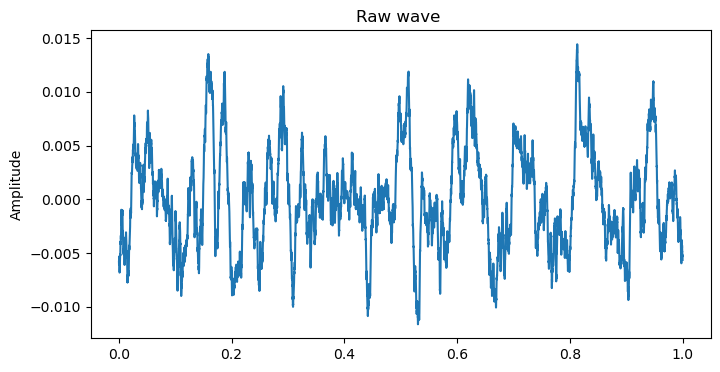

In [9]:
# Shifting the sound
data_roll = np.roll(data, 1600)
plot_time_series(data_roll)
ipd.Audio(data_roll, rate=16000)

In [10]:
pip install audiomentations

Note: you may need to restart the kernel to use updated packages.
